In [15]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [16]:
# datos de entrada 
N = 80 # día del año

phi = 18.839444 * np.pi / 180 # latitud

L_loc = - 99.235278 * np.pi / 180 # longitud local

L_zh = - 90 * np.pi / 180 # longitud de referencia

C_1 = 0 # horario de verano

t_est = 12 + 27 / 60 # hora del día

In [17]:
# declinacion
delta = 0.4093 * np.sin(2 * np.pi * (284 + N) / 365)

In [18]:
# duracion del dia
omega_o = np.arccos(-np.tan(delta)*np.tan(phi))
t_d = 24 * omega_o / np.pi
omega_a = - omega_o

In [19]:
# hora amanecer y ocaso en tiempo estándar
t_so = 12 * omega_o / np.pi + 12

t_sa = - 12 * omega_o / np.pi + 12

B = (N - 81) * 2 * np.pi / 364

E_t = 9.87 * np.sin(2 * B) - 7.53 * np.cos(B) - 1.5 * np.sin(B)

t_esto = (t_so) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

t_esta = (t_sa) - 12 * (L_loc - L_zh) / np.pi + C_1 + (E_t / 60)

In [20]:
#acimut
t_est = np.arange(0,25)
t_sol = t_est + 12 * (L_loc - L_zh) / np.pi + (9.87 * np.sin(2 * (N - 81) * 2 * np.pi / 364) - 7.53 * np.cos((N - 81) * 2 * np.pi / 364) - 1.5 * np.sin((N - 81) * 2 * np.pi / 364)) / 60 + C_1
omega = np.pi * (t_sol - 12) / 12
gamma_s = np.arctan2(np.sin(omega)* np.cos(delta),np.sin(phi) * np.cos(omega) * np.cos(delta) - np.cos(phi) * np.sin(delta))
np.rad2deg(gamma_s)

array([ 147.94754051, -168.12678826, -132.85114452, -115.18823036,
       -105.3119434 ,  -98.61126992,  -93.26915935,  -88.387406  ,
        -83.32684587,  -77.36161207,  -69.24133924,  -56.11983083,
        -30.97748034,   11.40461253,   45.90068869,   63.69753924,
         73.74772026,   80.55813302,   85.95508982,   90.84716395,
         95.87562013,  101.75990644,  109.73752407,  122.67041303,
        147.94754051])

In [21]:
print("delta =",np.rad2deg(delta))

delta = -0.4036732133225182


In [22]:
print("t_d =",t_d," h")

t_d = 11.98163544513211  h


In [23]:
print("t_a =",t_esta," h")

t_a = 6.494139785078937  h


In [24]:
print("t_o =",t_esto," h")

t_o = 18.47577523021105  h


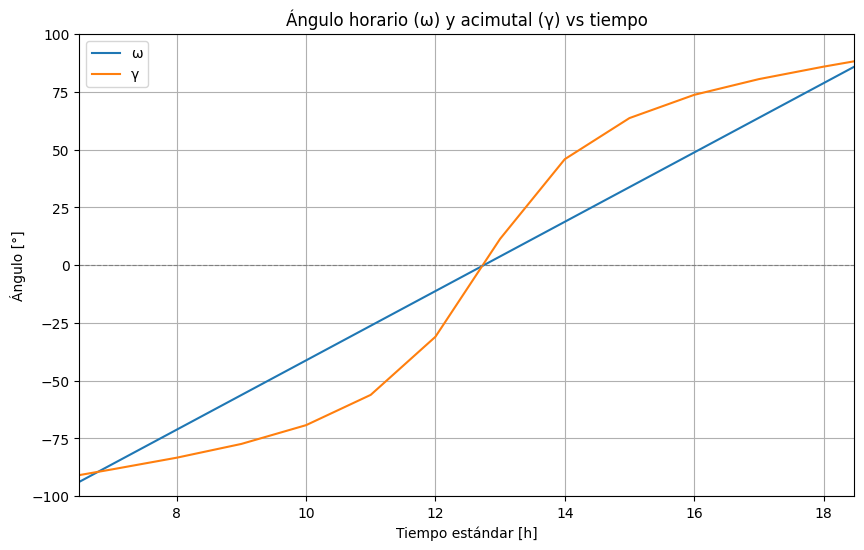

In [32]:
plt.figure(figsize=(10,6))
plt.plot(t_est, np.rad2deg(omega), label="ω")
plt.plot(t_est, np.rad2deg(gamma_s), label="γ")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo estándar [h]")
plt.ylabel("Ángulo [°]")
plt.title("Ángulo horario (ω) y acimutal (γ) vs tiempo")
plt.xlim(t_esta,t_esto)
plt.ylim(-100, 100)
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# altura
alpha = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(omega))
# cenital
theta_z = np.pi / 2 - alpha

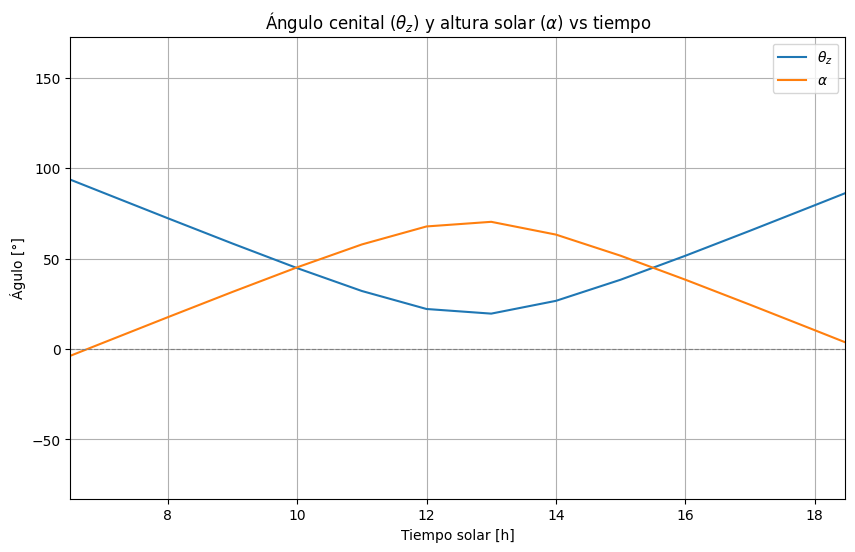

In [35]:
plt.figure(figsize=(10,6))
plt.plot(t_est, np.rad2deg(theta_z), label=r"$\theta_z$")
plt.plot(t_est, np.rad2deg(alpha), label=r"$\alpha$")

plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlabel("Tiempo solar [h]")
plt.ylabel("Águlo [°]")
plt.title(r"Ángulo cenital ($\theta_z$) y altura solar ($\alpha$) vs tiempo")
plt.xlim(t_esta,t_esto)
plt.legend()
plt.grid(True)
plt.show()

In [28]:
t_m = 12 - np.pi * (L_loc - L_zh) / 12 - C_1 - E_t / 60
print("t_m = ",t_m," h")

t_m =  12.172926090685603  h
